In [1]:
import pandas as ps
import numpy as pn
import matplotlib.pyplot as mt
import seaborn as sns

mt.style.use('ggplot')

import nltk
nltk.download('maxent_ne_chunker')
from sklearn.model_selection import train_test_split
import warnings
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Harshit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [2]:
ps.options.display.max_columns = None
ps.options.display.max_rows = None
pn.set_printoptions(suppress=True)

In [3]:
fd = ps.read_csv("C:/Users/Harshit/Downloads/Sentiment.csv", usecols=['text', 'sentiment'])
fd.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [4]:
fd.columns

Index(['sentiment', 'text'], dtype='object')

In [5]:
fd.shape

(13871, 2)

In [6]:
fd.groupby("sentiment").describe()

text                                                               
          count unique                                                top freq
sentiment                                                                     
Negative   8493   6129  RT @RWSurferGirl: Jeb Bush reminds me of eleva...  159
Neutral    3142   2729  RT @ericstonestreet: Trump has Cam hands. #GOP...   33
Positive   2236   1709  RT @RWSurferGirl: I think Cruz and Trump need ...   72

In [7]:
fd.isnull().sum()/len(fd)*100

sentiment    0.0
text         0.0
dtype: float64

In [8]:
fd.columns

Index(['sentiment', 'text'], dtype='object')

In [9]:
fd.head(5)

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [10]:
fd.dropna(inplace=True)

In [56]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [57]:
sia = SentimentIntensityAnalyzer()

In [58]:
sia.polarity_scores('He is a great leader.')

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

In [59]:
sia.polarity_scores('He is a terrible leader.')

{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}

In [11]:
fd = fd[fd['sentiment'] != 'Neutral']

In [12]:
positive = fd[fd['sentiment'] == "Positive"]
negative = fd[fd['sentiment'] == "Negative"]

In [13]:
negative.shape

(8493, 2)

In [14]:
positive.shape

(2236, 2)

In [15]:
fd.dropna(inplace=True)

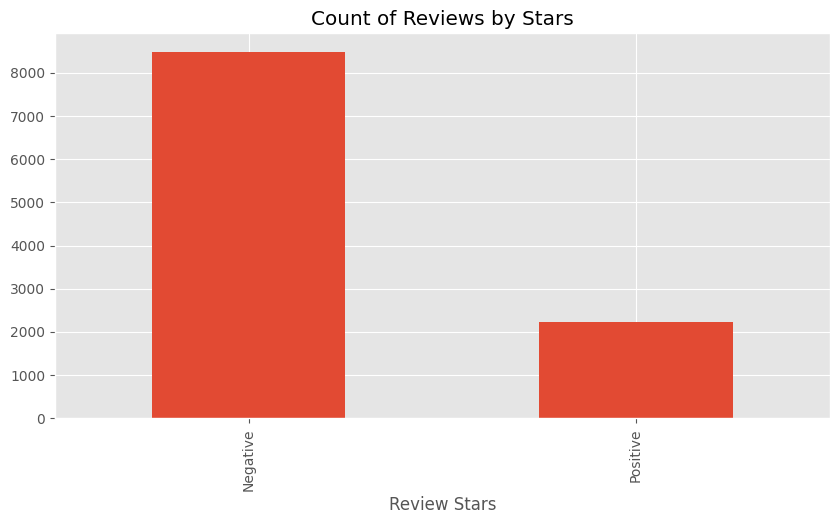

In [16]:
ax = fd['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
mt.show()

In [17]:
fd.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [18]:
positive = fd[fd['sentiment'] == "Positive"]
negative = fd[fd['sentiment'] == "Negative"]

In [19]:
positive=positive.sample(negative.shape[0],replace=True)

In [20]:
fd= ps.concat([positive, negative], ignore_index=True)

In [21]:
fd.head()

,sentiment,text
0,Positive,RT @RWSurferGirl: I think Cruz and Trump need ...
1,Positive,RT @GovMikeHuckabee: .@FrankLuntz #GOPDebate a...
2,Positive,"Now that the dust is settling from last night,..."
3,Positive,RT @EightDotters: I just took a stroll through...
4,Positive,RT @DonnieWahlberg: Enjoyed the #GOPDebates an...


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fd['text'], fd['sentiment'],
                                                   test_size=0.3, random_state=101)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# apply randomforest classification
from sklearn.ensemble import RandomForestClassifier

# pipeline package to merge both ML and NLP together
from sklearn.pipeline import Pipeline

In [24]:
classification_model = Pipeline([('bag_of_words', CountVectorizer()),
                                ('RandomForestClassifier', RandomForestClassifier())])

In [25]:
classification_model.fit(x_train, y_train)

Pipeline(steps=[('bag_of_words', CountVectorizer()),
                ('RandomForestClassifier', RandomForestClassifier())])

In [26]:
y_pred_train = classification_model.predict(x_train)
y_pred_test = classification_model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [28]:
print(confusion_matrix(y_train, y_pred_train))
print("************************"*5)
print(confusion_matrix(y_test, y_pred_test))

[[5791  165]
 [  95 5839]]
************************************************************************************************************************
[[2387  150]
 [  96 2463]]


In [29]:
print(classification_report(y_train, y_pred_train))
print("************************"*5)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

    Negative       0.98      0.97      0.98      5956
    Positive       0.97      0.98      0.98      5934

    accuracy                           0.98     11890
   macro avg       0.98      0.98      0.98     11890
weighted avg       0.98      0.98      0.98     11890

************************************************************************************************************************
              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95      2537
    Positive       0.94      0.96      0.95      2559

    accuracy                           0.95      5096
   macro avg       0.95      0.95      0.95      5096
weighted avg       0.95      0.95      0.95      5096



In [30]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("************************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Training Accuracy 0.9781328847771237
************************************************************************************************************************
Test Accuracy 0.9517268445839875


In [31]:
test1 = ["he is a good leader."]
test2 = ["he is a terrible leader"]
test3 = ["chammo is really good at coding."]
test4 = ["chammo is very bad at coding"]
test5 = ["i am a good coder"]

In [32]:
print(classification_model.predict(test1))
print("*****************"*5)
print(classification_model.predict(test2))
print("*****************"*5)
print(classification_model.predict(test3))
print("*****************"*5)
print(classification_model.predict(test4))
print("*****************"*5)
print(classification_model.predict(test5))

['Positive']
*************************************************************************************
['Negative']
*************************************************************************************
['Positive']
*************************************************************************************
['Negative']
*************************************************************************************
['Positive']
